In [176]:
# !pip install missingno
# !pip install geopy

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
df_EDA = pd.read_pickle('/content/drive/My Drive/Airbnb/df_EDA.pkl')

In [180]:
df = df_EDA.copy()

In [181]:
# df = df.drop(columns=['Listing ID','Host ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Listing ID             23536 non-null  int64         
 1   Accomodates            23536 non-null  float64       
 2   Accuracy Rating        18888 non-null  float64       
 3   Bathrooms              23507 non-null  float64       
 4   Bedrooms               23516 non-null  float64       
 5   Beds                   23501 non-null  float64       
 6   Checkin Rating         18870 non-null  float64       
 7   Cleanliness Rating     18892 non-null  float64       
 8   Communication Rating   18886 non-null  float64       
 9   Guests Included        23536 non-null  float64       
 10  Host ID                23536 non-null  float64       
 11  Latitude               23536 non-null  float64       
 12  Location Rating        18871 non-null  float64       
 13  L

## Defines data columns Lists

In [182]:
numerical_columns = ['Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included','Min Nights','Reviews','Price']
rating_columns = ['Value Rating','Location Rating', 'Cleanliness Rating','Checkin Rating','Accuracy Rating','Communication Rating','Host Response Rate','Overall Rating']
boolean_columns = ['Is Superhost','Is Exact Location', 'Instant Bookable']
categorical_columns = ['Room Type','Property Type Reduced','Neighborhood Group','Postal Code Reduced','Host Response Time'] # , 'Neighbourhood Grouped'
date_columns = ['review_date','Host Since']
non_categorical_columns = numerical_columns + rating_columns + boolean_columns

# EDA - Explenatory Data Analysis

In [183]:
df.head()

,Listing ID,Accomodates,Accuracy Rating,Bathrooms,Bedrooms,Beds,Checkin Rating,Cleanliness Rating,Communication Rating,Guests Included,Host ID,Latitude,Location Rating,Longitude,Min Nights,Overall Rating,Reviews,Value Rating,review_date,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,Postal Code,Is Exact Location,Property Type,Room Type,Price,Instant Bookable,Neighbourhood Grouped,Property Type Reduced,Postal Code Reduced,Host Since Year,Host Since Month,Host Since Day
0,2695,2.0,10.0,1.0,1.0,1.0,10.0,10.0,10.0,1.0,2986.0,52.54851,9.0,13.40455,2.0,100.0,7.0,10.0,04-21-19,2008-09-16,within a day,50.0,False,Prenzlauer Berg,Pankow,10437,True,Apartment,Private room,17.0,False,Pankow,Apartment,10,2008,9,16
1,3176,4.0,9.0,1.0,1.0,2.0,9.0,9.0,9.0,2.0,3718.0,52.53500,10.0,13.41758,62.0,92.0,144.0,9.0,10-29-18,2008-10-19,within a day,50.0,False,Prenzlauer Berg,Pankow,10405.0,True,Apartment,Entire home/apt,90.0,False,Pankow,Apartment,10,2008,10,19
2,7071,2.0,10.0,1.0,1.0,2.0,10.0,10.0,10.0,1.0,17391.0,52.54316,10.0,13.41509,2.0,96.0,229.0,10.0,05-08-19,2009-05-16,within an hour,100.0,True,Prenzlauer Berg,Pankow,10437.0,True,Apartment,Private room,33.0,False,Pankow,Apartment,10,2009,5,16
3,9991,7.0,10.0,2.5,4.0,7.0,10.0,10.0,10.0,5.0,33852.0,52.53303,10.0,13.41605,6.0,100.0,6.0,10.0,07-23-18,2009-08-25,within a day,100.0,False,Prenzlauer Berg,Pankow,10405.0,False,Apartment,Entire home/apt,180.0,False,Pankow,Apartment,10,2009,8,25
4,14325,1.0,10.0,1.0,0.0,1.0,9.0,10.0,10.0,1.0,55531.0,52.54785,9.0,13.40556,90.0,93.0,23.0,9.0,11-01-18,2009-11-18,within a day,100.0,False,Prenzlauer Berg,Pankow,10437,True,Apartment,Entire home/apt,70.0,False,Pankow,Apartment,10,2009,11,18


## Data Protocol

In [184]:
#Type of data
df.dtypes.to_excel ("df_datatype.xlsx", sheet_name='data_types')

#Maximum points
df[non_categorical_columns].max().to_excel("df_max.xlsx", sheet_name='max')

#Minimum points
df[non_categorical_columns].max().to_excel("df_max.xlsx", sheet_name='min')

#Isnull values
df.isnull().to_excel("df_isnull.xlsx", sheet_name='isnull')

#unique values
df.nunique().to_excel("df_nunique.xlsx", sheet_name='nunique')

# Categorical values
df[categorical_columns].describe().to_excel("df_categorical.xlsx", sheet_name='categorical')

## Descriptive statistics
   

In [185]:
df.shape

(23536, 37)

In [186]:
df[numerical_columns].describe()

,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Price
count,23536.000000,23507.000000,23516.000000,23501.000000,23536.000000,23536.000000,23536.000000,23536.000000
mean,2.671737,1.095971,1.161720,1.641802,1.346151,6.897774,19.238826,69.612424
std,1.567812,0.346150,0.660736,1.228642,0.856297,24.879032,40.360483,216.660408
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,32.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,49.000000
75%,3.000000,1.000000,1.000000,2.000000,1.000000,4.000000,17.000000,75.000000
max,16.000000,8.500000,10.000000,22.000000,16.000000,1000.000000,545.000000,9000.000000


In [187]:
df[rating_columns].describe()

,Value Rating,Location Rating,Cleanliness Rating,Checkin Rating,Accuracy Rating,Communication Rating,Host Response Rate,Overall Rating
count,18868.000000,18871.000000,18892.000000,18870.000000,18888.000000,18886.000000,13046.000000,18914.000000
mean,9.417638,9.550315,9.334904,9.728829,9.679850,9.746479,91.842174,94.564344
std,0.840456,0.748713,1.031248,0.695275,0.737798,0.679600,19.447852,7.599949
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,20.000000
25%,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,95.000000,92.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,97.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,100.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,100.000000


In [188]:
df[['Host Since Year', 'Host Since Month', 'Host Since Day']].describe()

,Host Since Year,Host Since Month,Host Since Day
count,23515,23515,23515
unique,12,12,31
top,2015,8,5
freq,4591,2575,878


Several rows with unusually high values can be identified and may in some cases be dropped at a certain threshold

The description of price shows that 75% of the room only charged within 70€. But we can find the maximized price is extremely large - up to 9000€.

To exclude the outlier in this dataset, we set the data limit of 600€.

It also shows that data has 0 price, that is not make sense. So we will exclude it too.

In [189]:
df[['Beds','Min Nights','Reviews','Price']].describe().loc[['max']].T

,max
Beds,22.0
Min Nights,1000.0
Reviews,545.0
Price,9000.0


## Target Value

In [190]:
df[['Price']].describe()

,Price
count,23536.000000
mean,69.612424
std,216.660408
min,0.000000
25%,32.000000
50%,49.000000
75%,75.000000
max,9000.000000


The description of price shows that 75% of the room only charged within 70€. But we can find the maximized price is extremely large - up to 9000€.

### Distribution of Price

In [191]:
def target_value_distributions(df):
  plt.figure(figsize=(10, 6))
  sns.histplot(df['Price'], bins=200, kde=True)
  plt.title("Distribution of Price")
  plt.xlabel("Price")
  plt.ylabel("Frequency")
  plt.show()

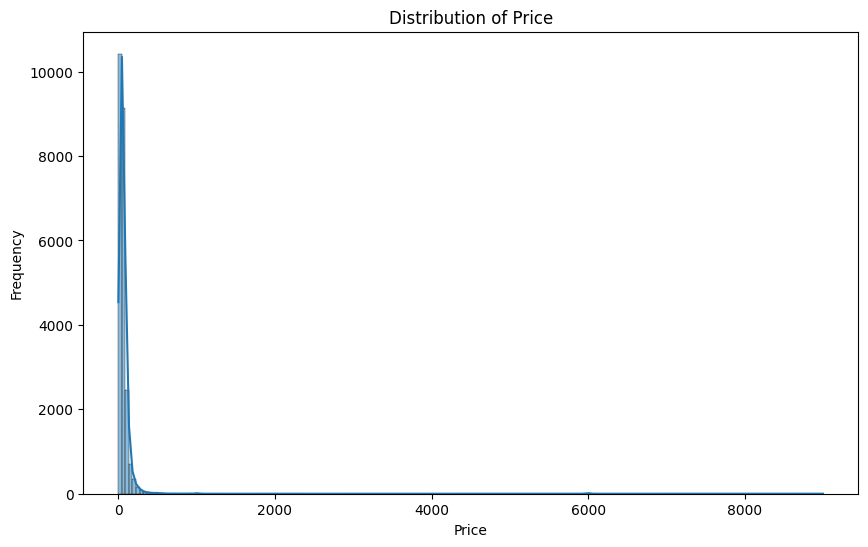

In [192]:
# Distribution of Price before dropping extream outlier values
target_value_distributions(df)

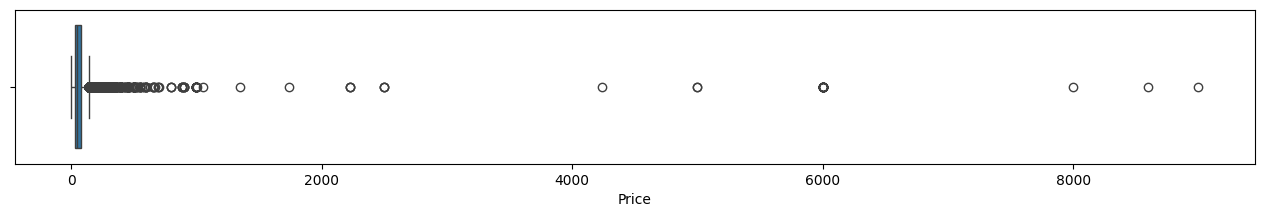

In [193]:
plt.figure(figsize=(16, 2))
sns.boxplot(df['Price'], orient='h')
plt.show()

To exclude the outlier in this dataset, we set the data limit of 600€.

In [194]:
df = df[(df['Price'] <= 600) & (df['Price'] > 0)]
df['Price'].describe()

,Price
count,23460.000000
mean,60.926726
std,49.445524
min,1.000000
25%,31.000000
50%,49.000000
75%,74.000000
max,600.000000


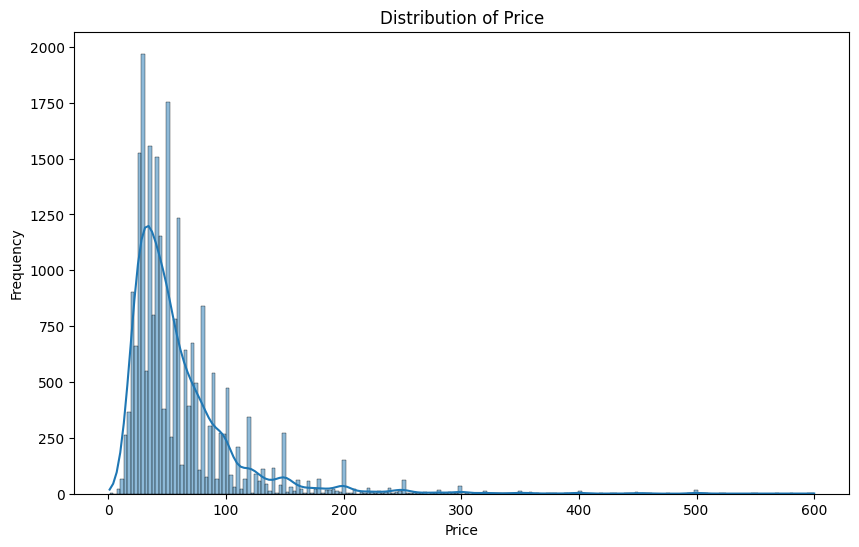

In [195]:
# Distribution of Price
target_value_distributions(df)

### Location vs Price

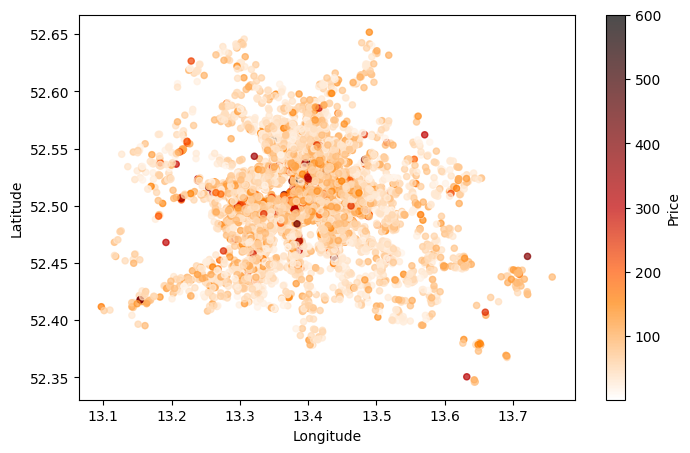

In [196]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.7, figsize=(8,5),
        c="Price", cmap="gist_heat_r", colorbar=True, sharex=False);

## Missing values

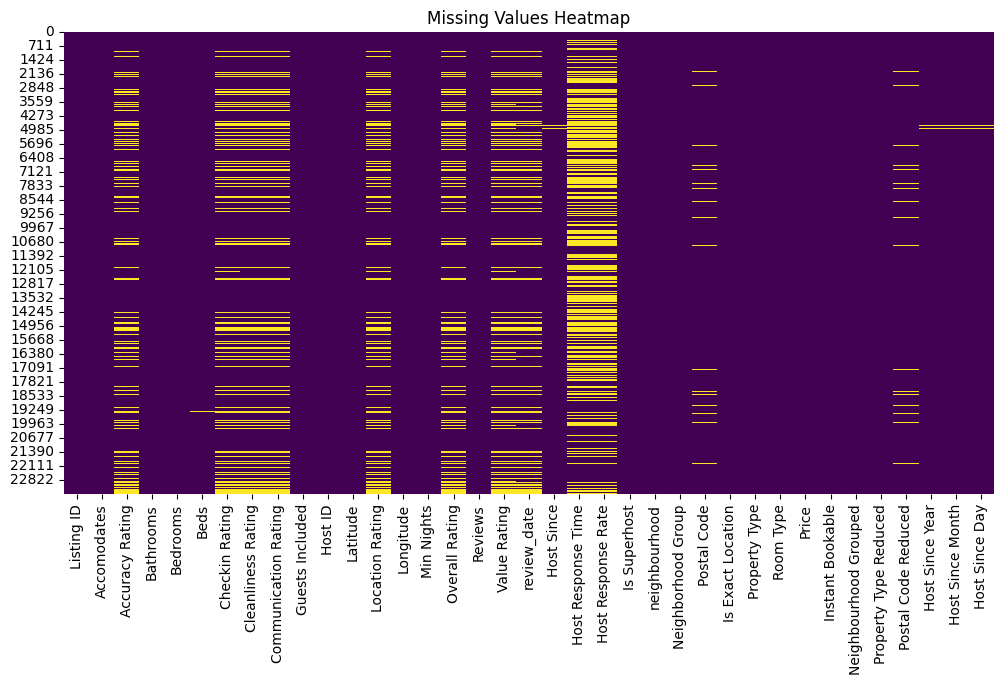

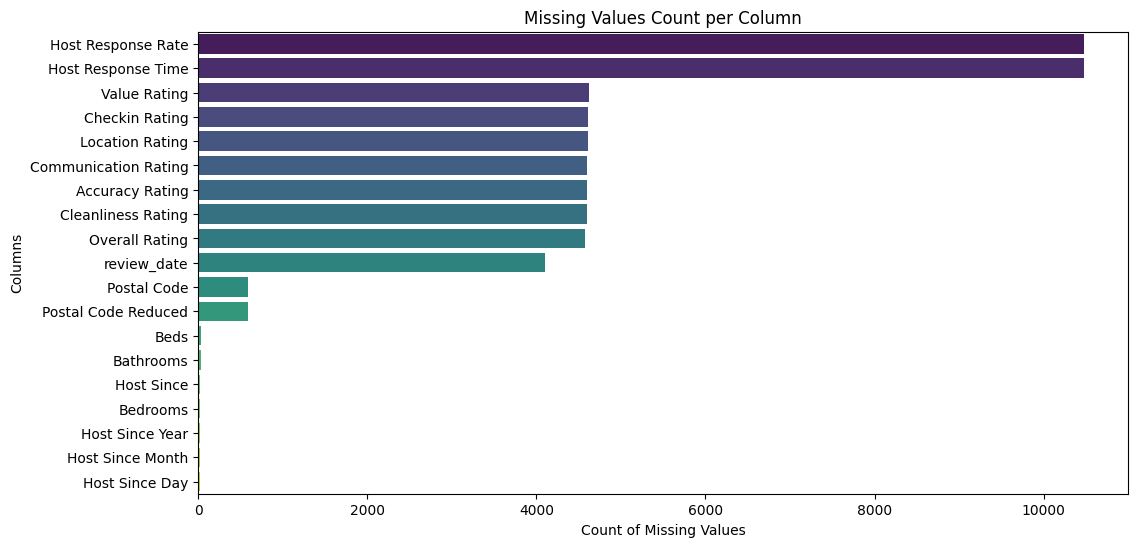


Missing Values:
Host Response Rate      10476
Host Response Time      10476
Value Rating             4618
Checkin Rating           4616
Location Rating          4615
Communication Rating     4600
Accuracy Rating          4598
Cleanliness Rating       4594
Overall Rating           4572
review_date              4108
Postal Code               585
Postal Code Reduced       585
Beds                       34
Bathrooms                  29
Host Since                 20
Bedrooms                   20
Host Since Year            20
Host Since Month           20
Host Since Day             20
dtype: int64


In [197]:
# Check for missing values
missing_values = df.isnull().sum()

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Display missing values as a bar chart
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()


print("\nMissing Values:")
print(missing_values)

## Dummies

In [198]:
def plot_counts_for_columns(df, columns_names, rows=1, cols=3, figsize_=(20, 6)):
  i = 1
  plt.figure(figsize=figsize_)
  plt.subplots_adjust(hspace = 0.5)
  for col in columns_names:
    plt.subplot(rows, cols, i)
    plt.title(f"'{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    sns.countplot(data=df, x=col, palette="viridis")
    i = i + 1

  plt.tight_layout()
  plt.show()
  print (i)

In [199]:
boolean_columns

['Is Superhost', 'Is Exact Location', 'Instant Bookable']

In [200]:
df['Is Superhost'] = df['Is Superhost'].astype(bool)
df[boolean_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23535
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Is Superhost       23460 non-null  bool 
 1   Is Exact Location  23460 non-null  bool 
 2   Instant Bookable   23460 non-null  bool 
dtypes: bool(3)
memory usage: 252.0 KB


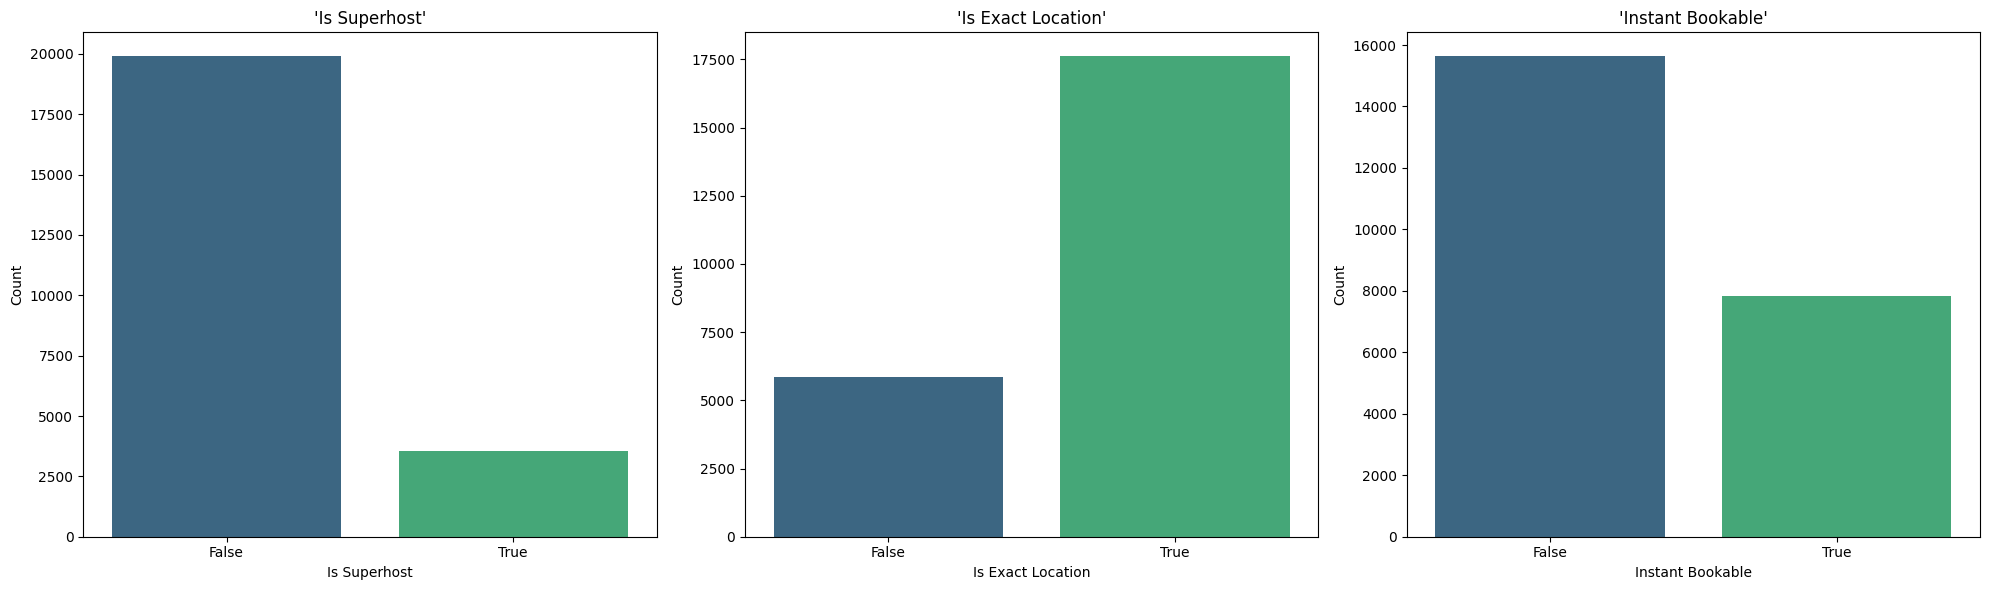

4


In [201]:
plot_counts_for_columns(df, boolean_columns)

## Categorial

In [202]:
df[categorical_columns].describe().T

,count,unique,top,freq
Room Type,23460,3,Private room,11658
Property Type Reduced,23460,15,Apartment,20914
Neighborhood Group,23460,12,Friedrichshain-Kreuzberg,5720
Postal Code Reduced,22875,7,10,14613
Host Response Time,12984,4,within an hour,6780


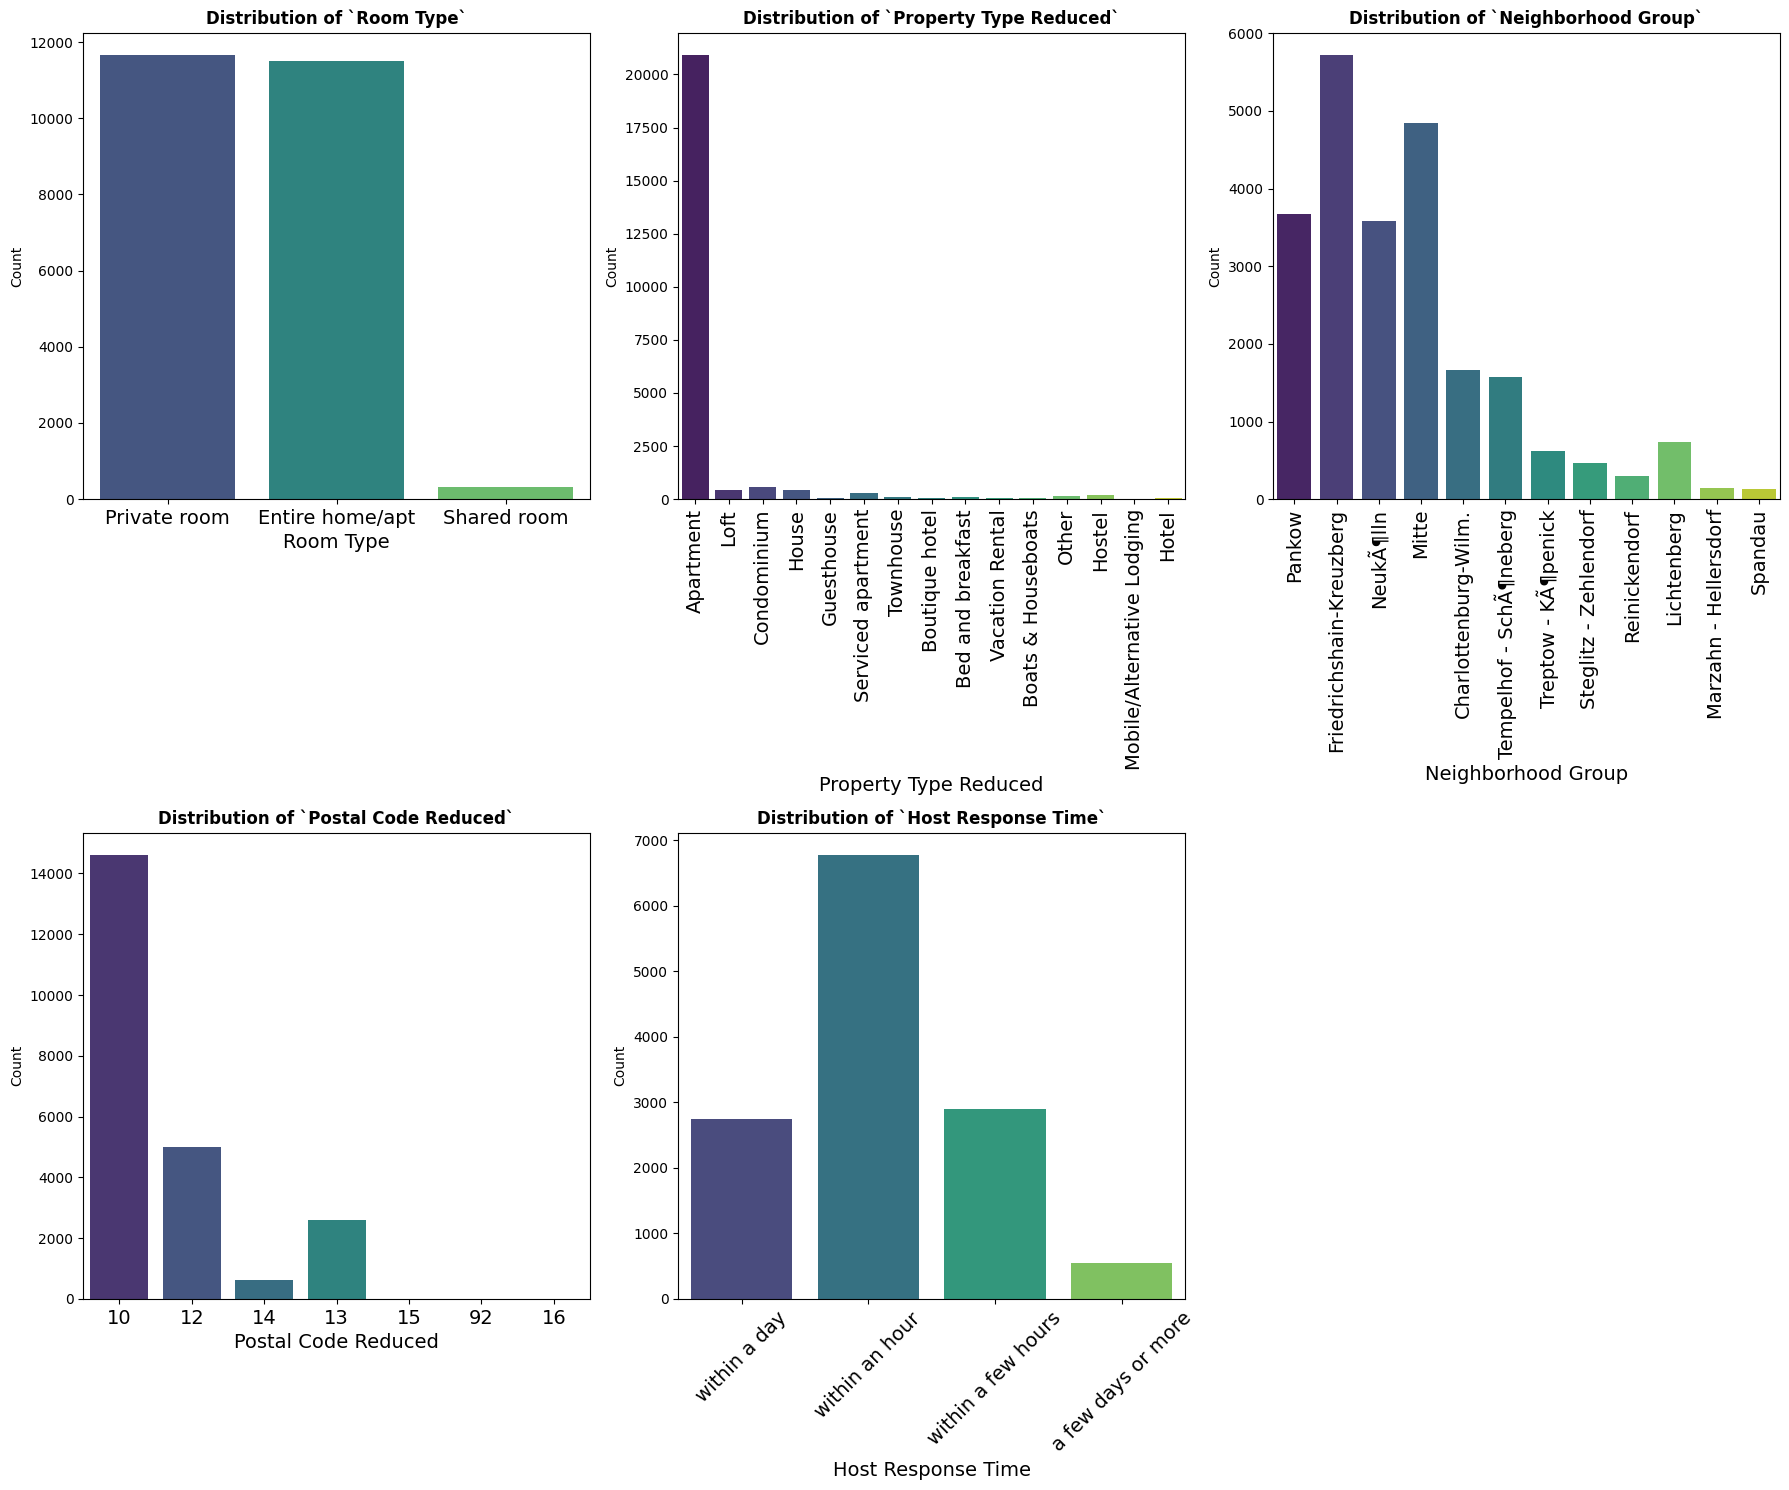

In [203]:
xticks_map = {'Room Type':0, 'Property Type Reduced':90, 'Neighborhood Group':90, 'Neighbourhood Grouped':90, 'Postal Code Reduced':0, 'Host Response Time':45}
i = 1
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace = 0.5)
for col in categorical_columns:
  plt.subplot(2, 3, i)
  plt.title(f"Distribution of `{col}`", fontsize=12, fontweight="bold")
  plt.xlabel(col, fontsize=14)
  plt.xticks(rotation=xticks_map.get(col, 0), fontsize=14)
  plt.ylabel("Count")
  sns.countplot(data=df, x=col, palette="viridis")
  i = i + 1

plt.tight_layout()
plt.show()

In [204]:
# df = df_EDA.copy()

In [205]:
# df['Host Since Year'] = df['Host Since Year'].astype('str').apply(lambda x: (x.split('.')[0]))
# df['Host Since Year'] = df['Host Since Year'].apply(lambda x: None if x == 'nan' else x).astype('category')
# df['Host Since Month'] = df['Host Since Month'].astype('str').apply(lambda x: x.split('.')[0])
# df['Host Since Month'] = df['Host Since Month'].apply(lambda x: None if x == 'nan' else x).astype('category')
# df['Host Since Day'] = df['Host Since Day'].astype('str').apply(lambda x: x.split('.')[0])
# df['Host Since Day'] = df['Host Since Day'].apply(lambda x: None if x == 'nan' else x).astype('category')

In [206]:
df['Host Since Year'].info()

<class 'pandas.core.series.Series'>
Index: 23460 entries, 0 to 23535
Series name: Host Since Year
Non-Null Count  Dtype   
--------------  -----   
23440 non-null  category
dtypes: category(1)
memory usage: 206.6 KB


In [207]:
df['Host Since Year'].isna().sum()

20

In [208]:
# df['Host Since Month'].value_counts().index.sort_values()
# df['Host Since Month'].value_counts().index.sort_values( key=lambda x: pd.to_numeric(x, errors='coerce'))

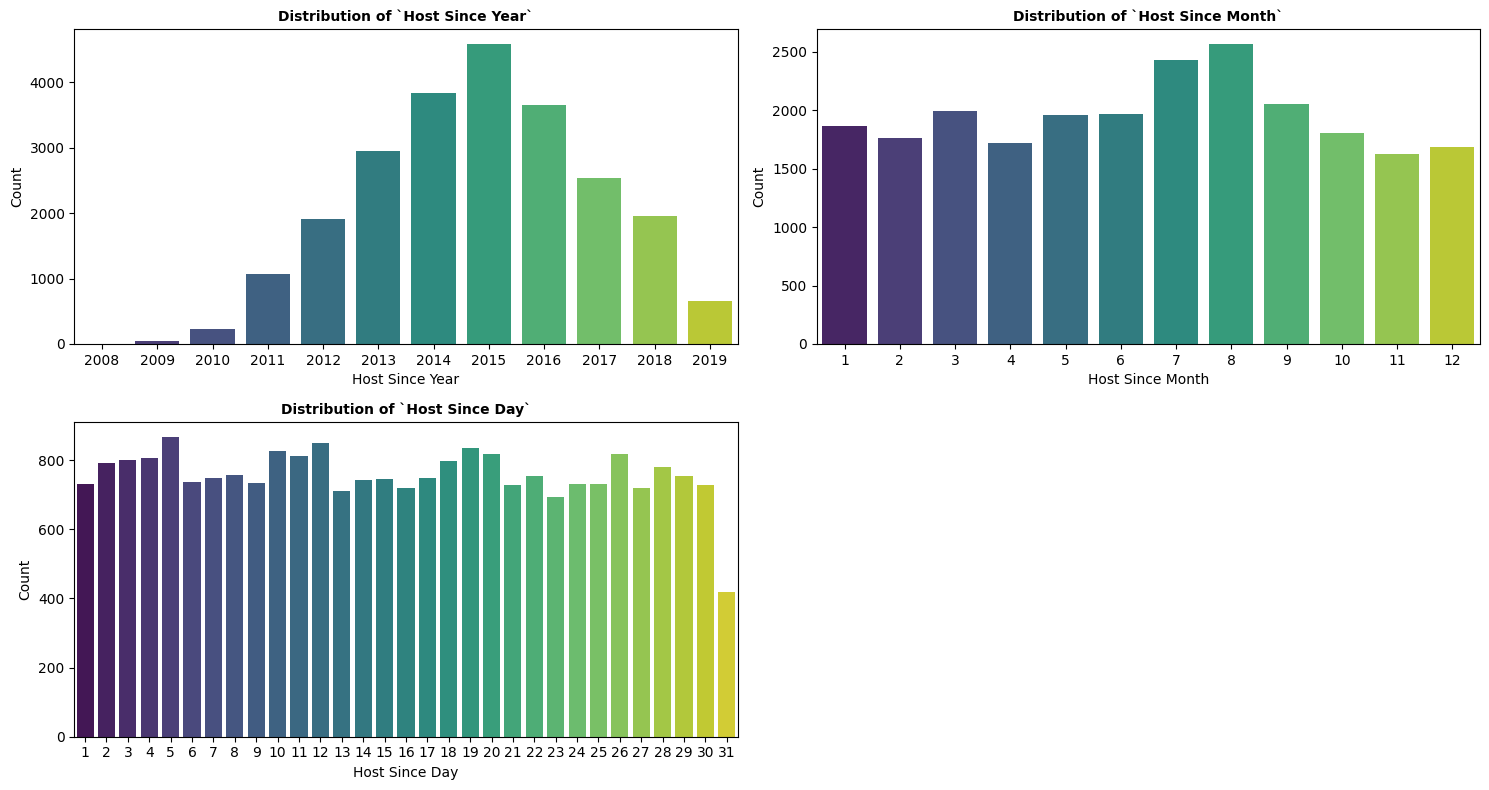

In [209]:
i = 1
plt.figure(figsize=(15, 8))
# Adjust spacing
plt.subplots_adjust(hspace=0.6)
for col in ['Host Since Year','Host Since Month','Host Since Day']:
  plt.subplot(2, 2, i)
  plt.title(f"Distribution of `{col}`", fontsize=10, fontweight="bold")
  plt.xlabel(col)
  plt.xticks(rotation=xticks_map.get(col, 0))
  plt.ylabel("Count")
  sorted_order = df[col].value_counts().index.sort_values( key=lambda x: pd.to_numeric(x, errors='coerce'))
  sns.countplot(data=df, x=col, order=sorted_order, palette="viridis")
  i = i + 1

plt.tight_layout()
plt.show()

## Continues and numrical data

In [210]:
def plot_heatmap_for_columns(df, numerical_columns):
  plt.figure(figsize=(12, 8))
  correlation_matrix = df[numerical_columns].corr()
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
  plt.title("Correlation Matrix of Numerical Features")
  plt.show()

In [211]:
categorical_columns

['Room Type',
 'Property Type Reduced',
 'Neighborhood Group',
 'Postal Code Reduced',
 'Host Response Time']

In [212]:
boolean_columns

['Is Superhost', 'Is Exact Location', 'Instant Bookable']

### Histograms for continues numbers

Checking the distribution of key numerical features

In [213]:
numerical_columns

['Accomodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Guests Included',
 'Min Nights',
 'Reviews',
 'Price']

In [214]:
def plot_histplot_for_columns(df, numerical_columns):
  plt.figure(figsize=(12, 12))
  plt.subplots_adjust(hspace = 0.5)
  for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col].dropna(), bins=50, kde=False)
    plt.title(f"Distribution of {col}")

  plt.tight_layout()
  plt.show()

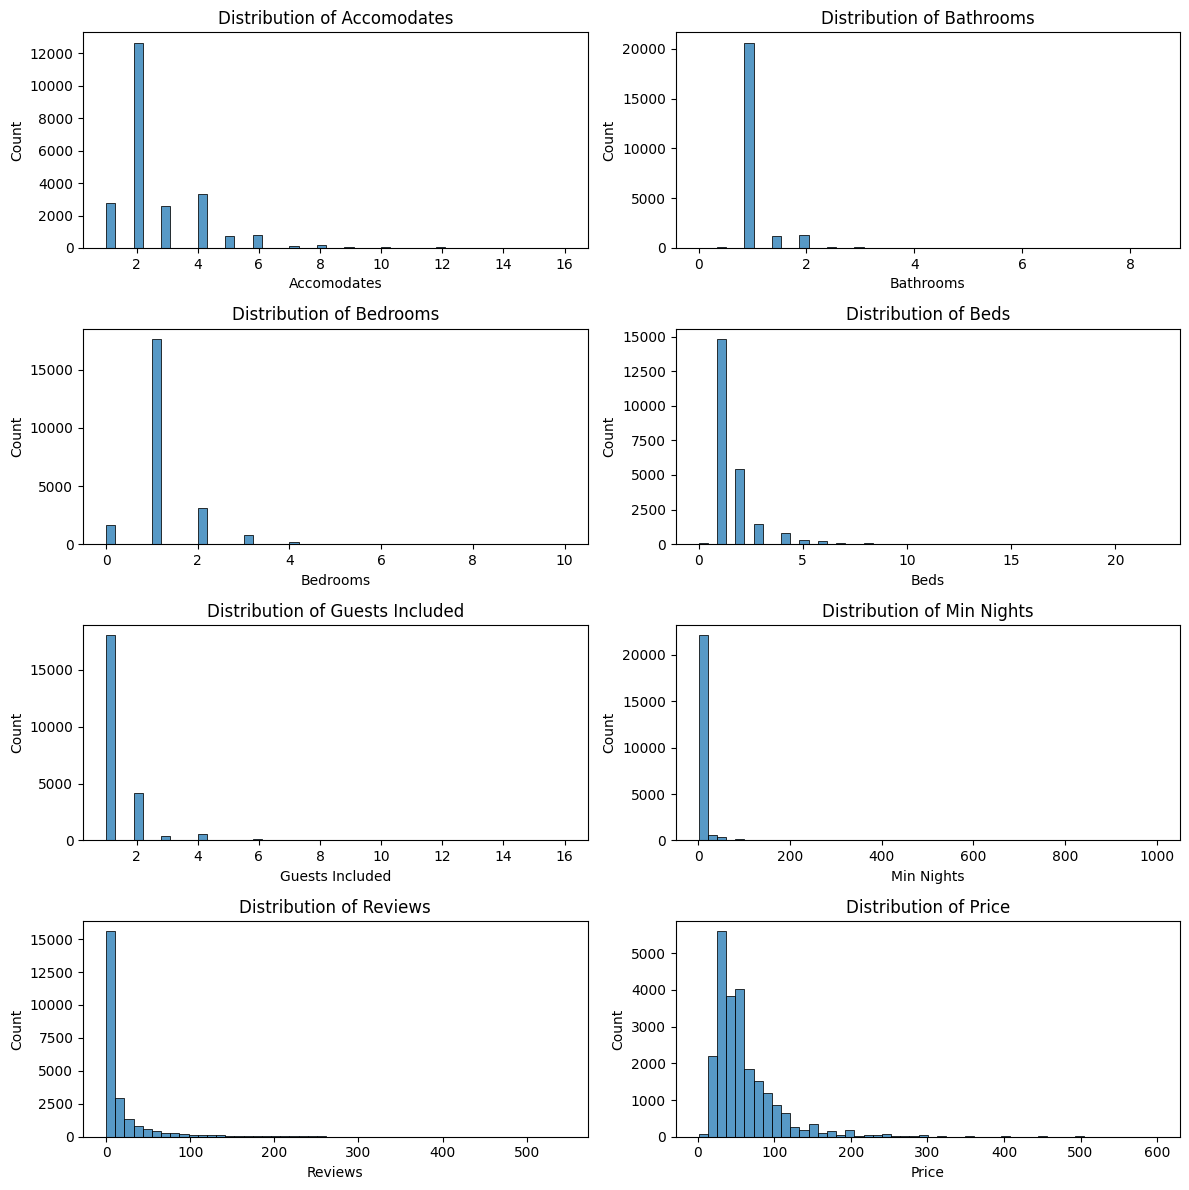

In [215]:
# Checking the distribution of key numerical features
# numerical_columns = [
#     "Price", "Reviews", "Overall Rating", "Bedrooms", "Bathrooms", "Beds", "Accomodates"
# ]

plot_histplot_for_columns(df, numerical_columns)

As expected, we can notice that some of the numerics are more categorical data like (for example, Accomadates, Bathrooms and Beds).
It worth using barplot to show relations ship with target value

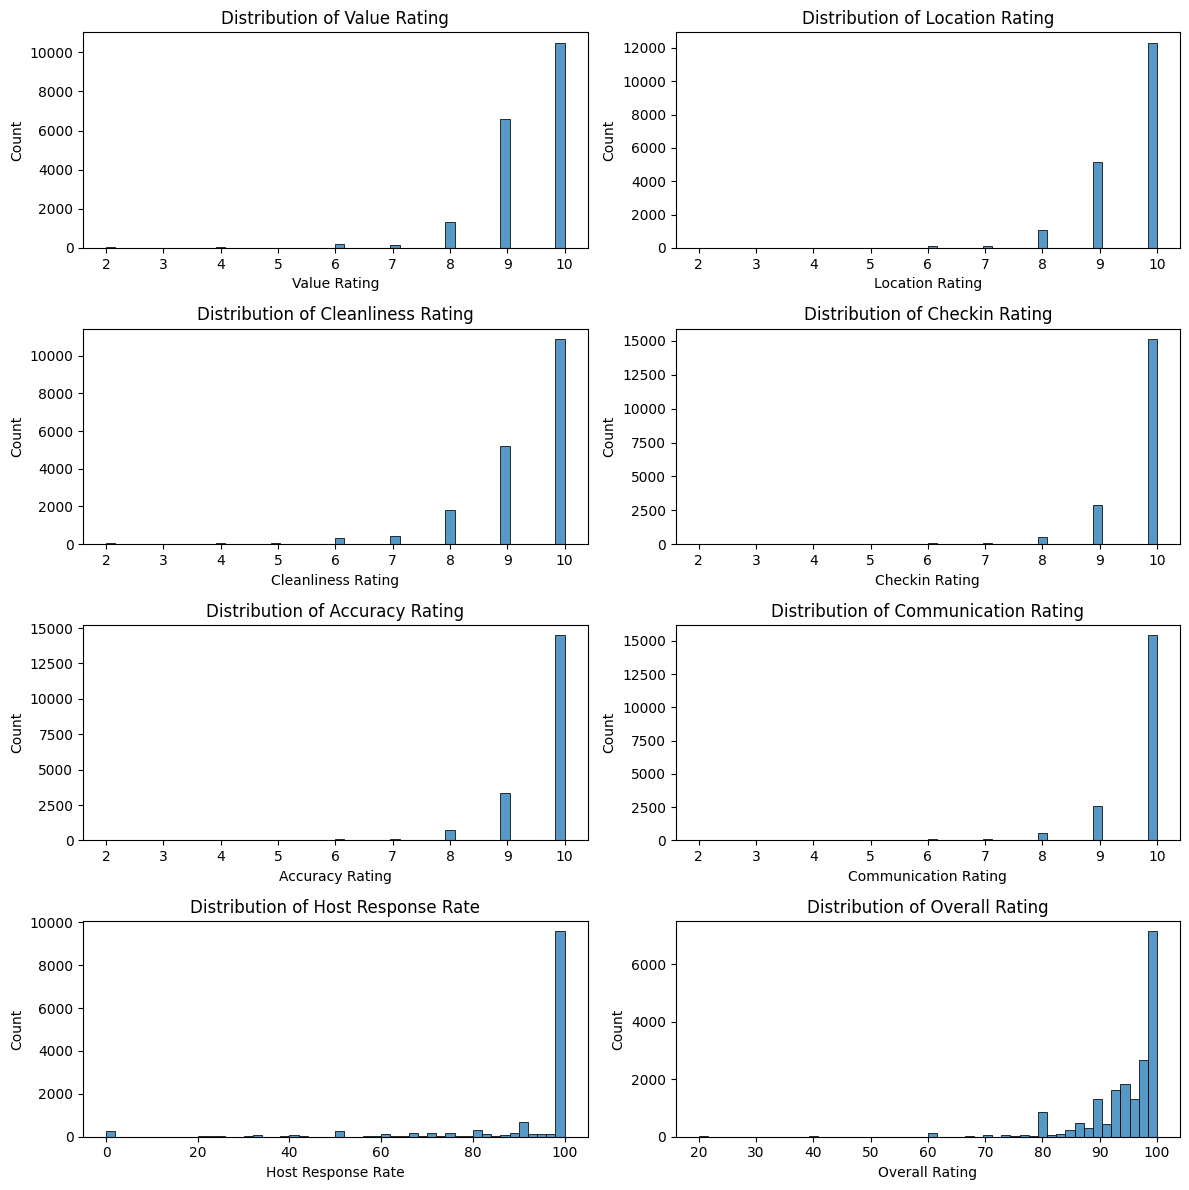

In [216]:
plot_histplot_for_columns(df, rating_columns)

### Bars for continues numbers

In [217]:
categorical_columns

['Room Type',
 'Property Type Reduced',
 'Neighborhood Group',
 'Postal Code Reduced',
 'Host Response Time']

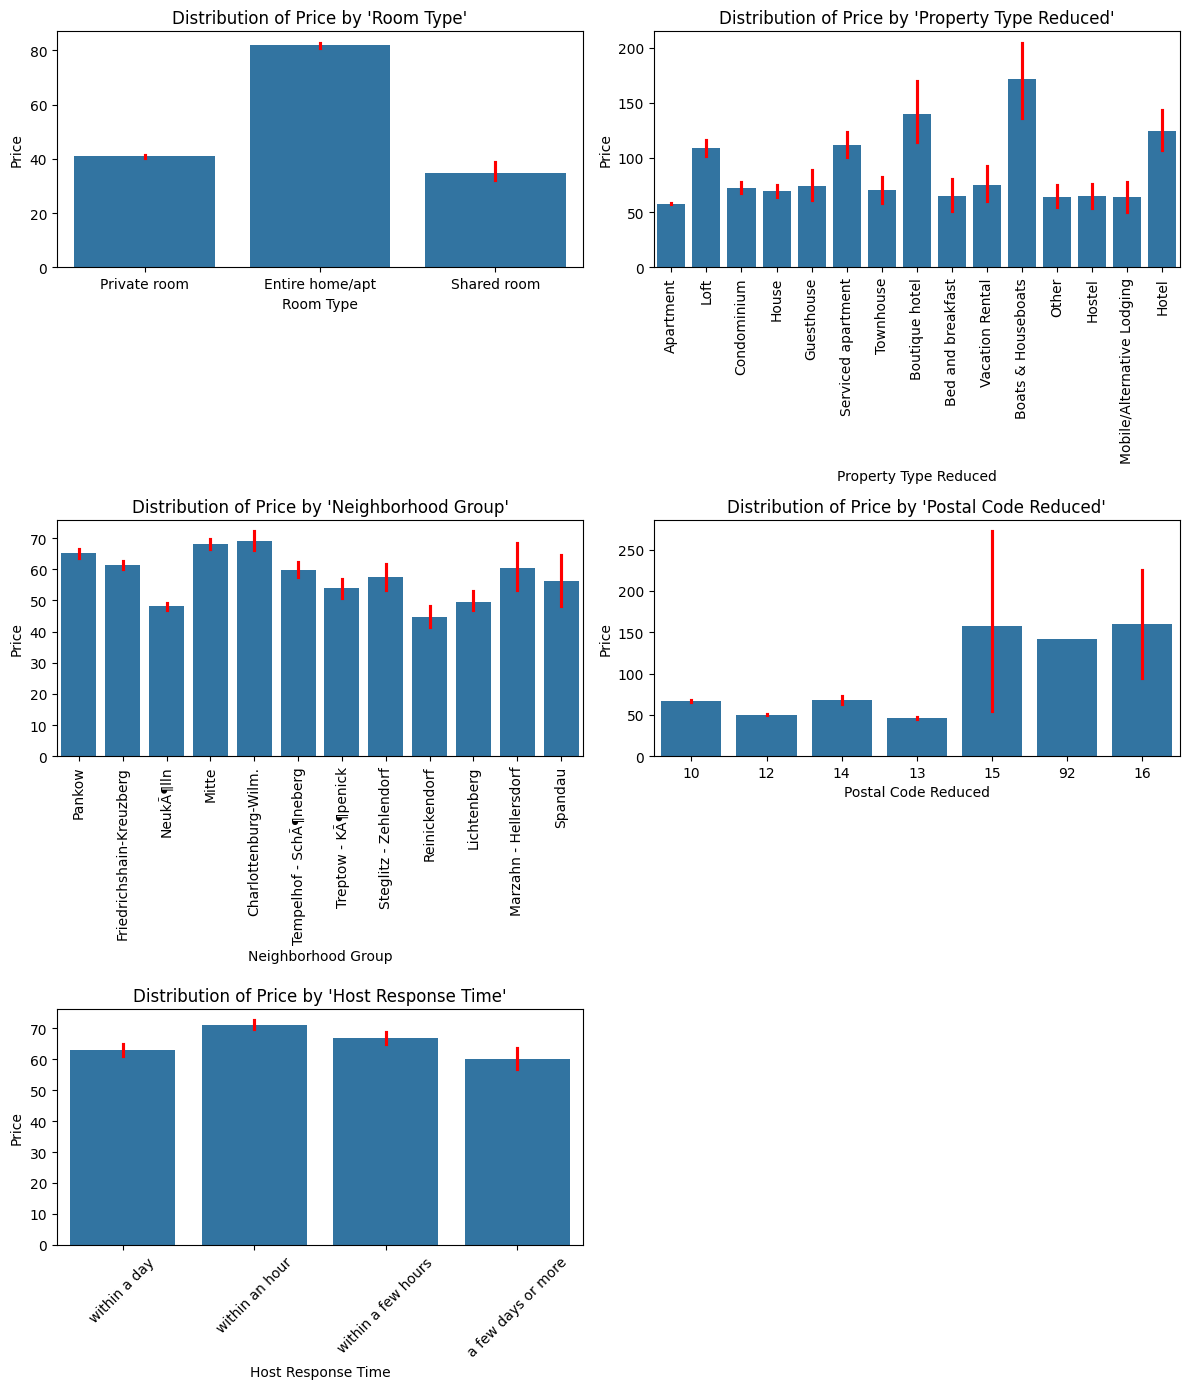

In [218]:
xticks_map = {'Room Type':0, 'Property Type Reduced':90, 'Neighborhood Group':90, 'Neighbourhood Grouped':90, 'Postal Code Reduced':0, 'Host Response Time':45}
plt.figure(figsize=(12, 14))
plt.subplots_adjust(hspace = 0.5)
for i, col in enumerate(categorical_columns, 1):
  plt.subplot(3, 2, i)
  sns.barplot(x=df[col], y=df['Price'], errcolor="red")
  plt.xticks(rotation=xticks_map.get(col))
  plt.title(f"Distribution of Price by '{col}'")

plt.tight_layout()
plt.show()

In [219]:
df['Room Type'].value_counts()

,count
Room Type,
Private room,11658
Entire home/apt,11491
Shared room,311


<Axes: xlabel='Price', ylabel='Count'>

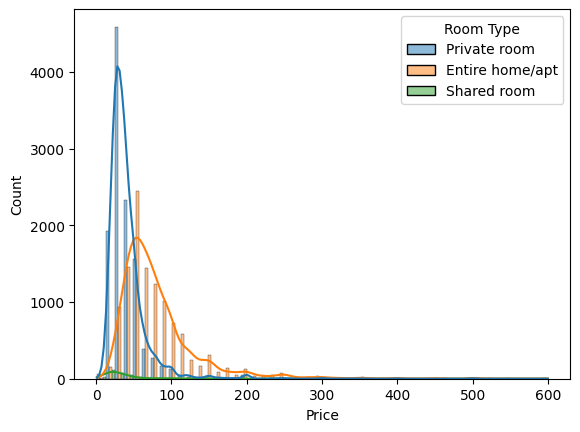

In [220]:
# sns.histplot(data = df[df['Room Type'] == 'Private room'], x="Price", bins=50, kde=True)
sns.histplot(data = df, x="Price", bins=50, hue="Room Type", kde=True, multiple="dodge")

In [221]:
boolean_columns

['Is Superhost', 'Is Exact Location', 'Instant Bookable']

<Axes: xlabel='Price', ylabel='Count'>

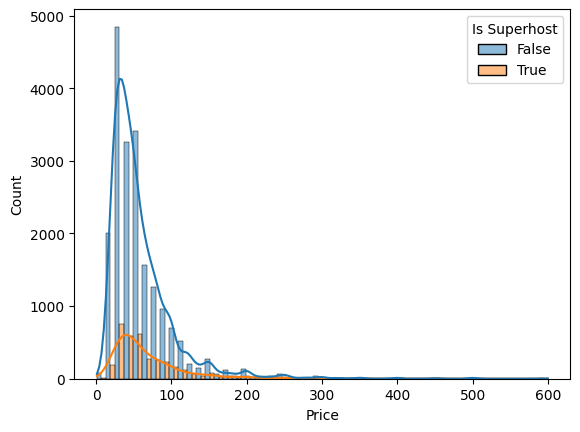

In [222]:
sns.histplot(data = df, x="Price", bins=50, hue="Is Superhost", kde=True, multiple="dodge")

<Axes: xlabel='Price', ylabel='Count'>

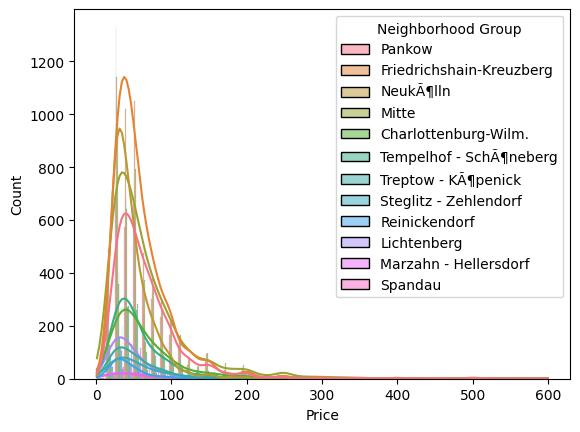

In [223]:
sns.histplot(data = df, x="Price", bins=50, hue="Neighborhood Group", kde=True, multiple="dodge")

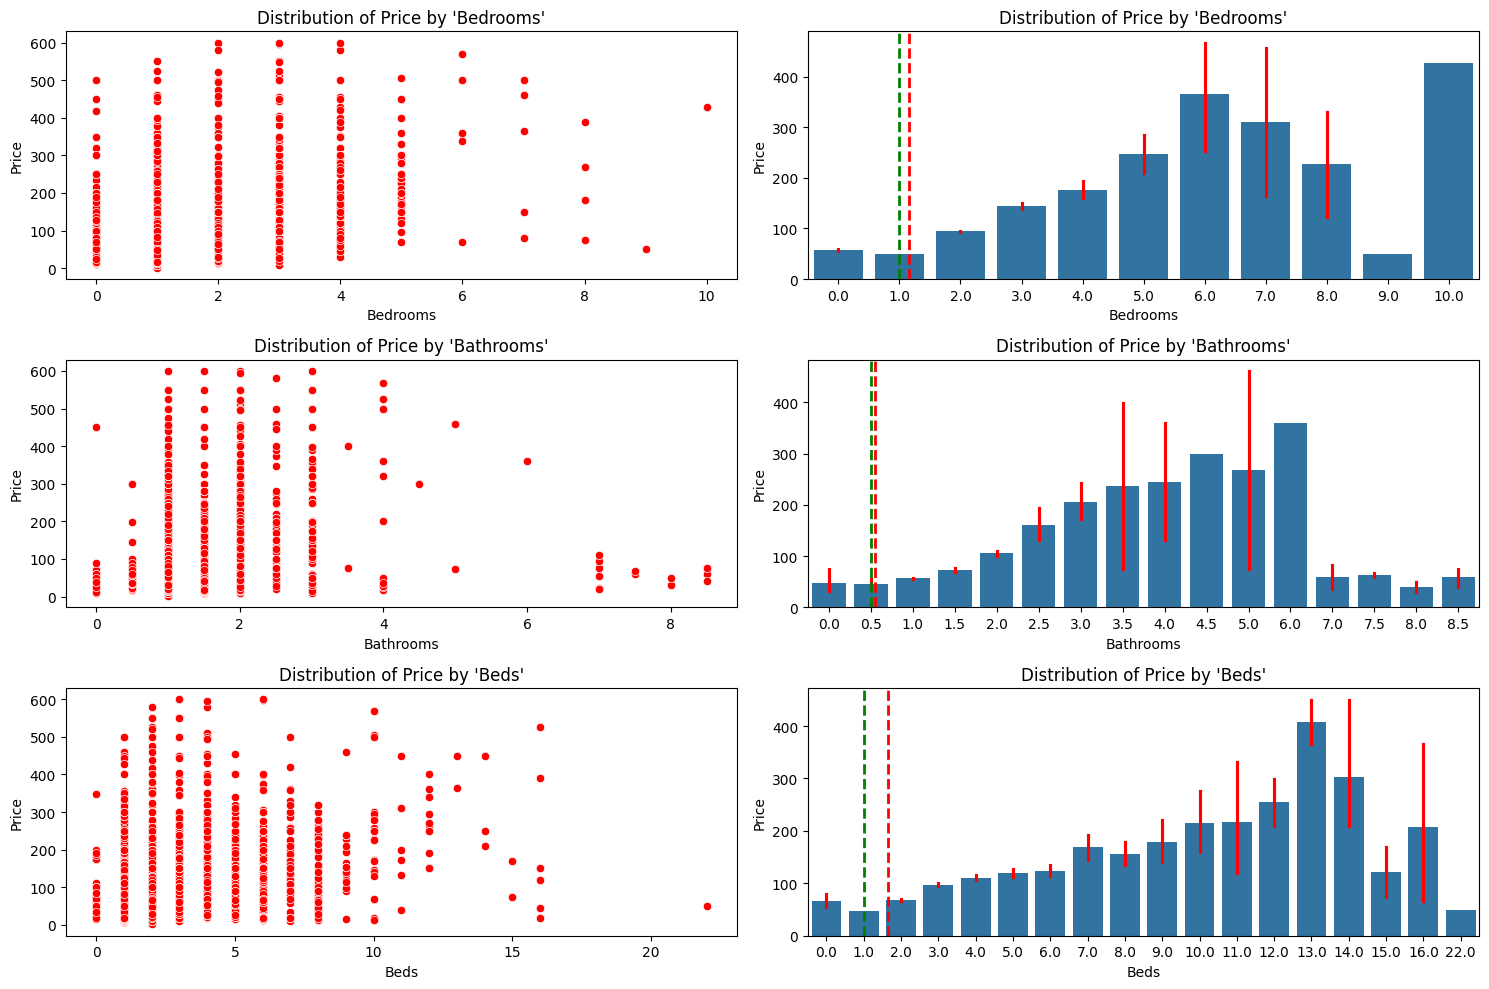

In [224]:
bar_plot_columns = ['Bedrooms', 'Bathrooms', 'Beds']
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.5)
i = 1
for col in bar_plot_columns:
  plt.subplot(3, 2, i)
  sns.scatterplot(x=df[col], y=df['Price'], color='red')
  plt.title(f"Distribution of Price by '{col}'")

  plt.subplot(3, 2, i+1)
  sns.barplot(x=df[col], y=df['Price'], errcolor="red")
  plt.title(f"Distribution of Price by '{col}'")
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)

  i = i + 2
plt.tight_layout()
plt.show()

### Checking correlations among numerical features

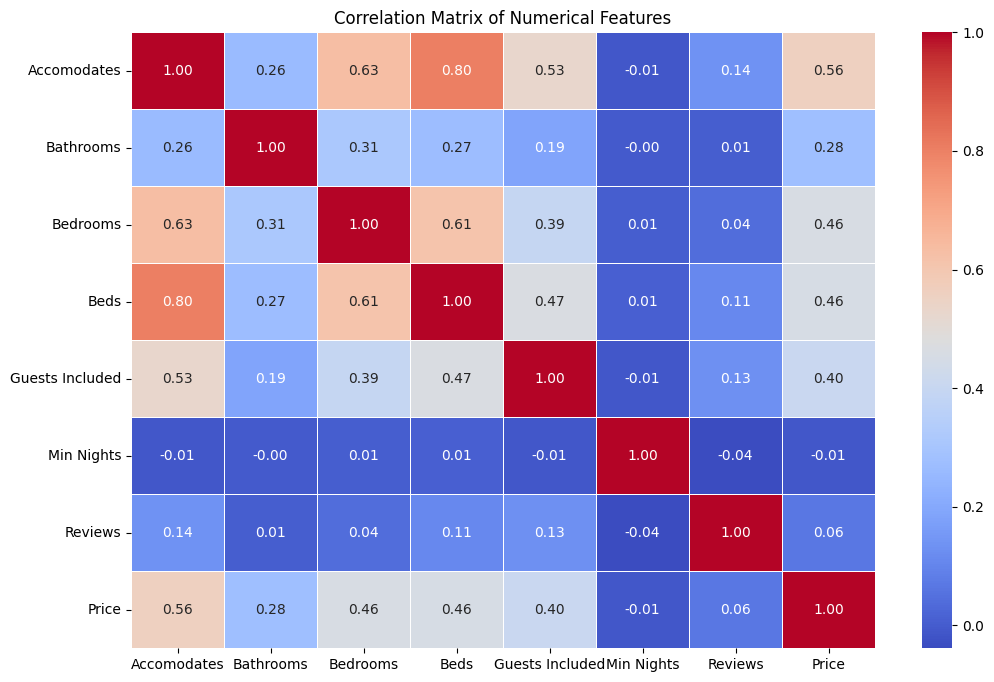

In [225]:
# Checking correlations among numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [226]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
  df[f"{col} Encoded"] = le.fit_transform(df[col])

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23535
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Listing ID                     23460 non-null  int64         
 1   Accomodates                    23460 non-null  float64       
 2   Accuracy Rating                18862 non-null  float64       
 3   Bathrooms                      23431 non-null  float64       
 4   Bedrooms                       23440 non-null  float64       
 5   Beds                           23426 non-null  float64       
 6   Checkin Rating                 18844 non-null  float64       
 7   Cleanliness Rating             18866 non-null  float64       
 8   Communication Rating           18860 non-null  float64       
 9   Guests Included                23460 non-null  float64       
 10  Host ID                        23460 non-null  float64       
 11  Latitude            

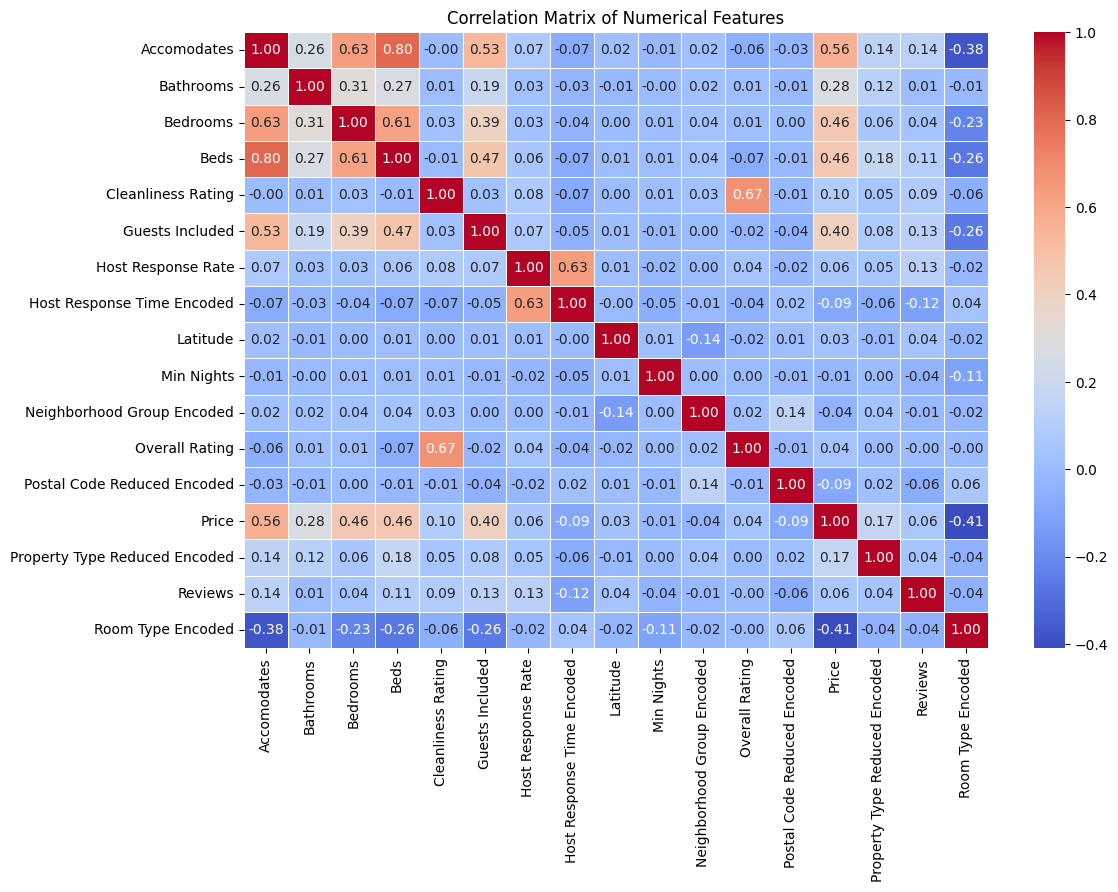

In [228]:
# Checking correlations among numerical features + categorical encode
heatmap_columns = df.select_dtypes(include=['number']).columns.difference(['Listing ID','Host ID',
                                                                           'Accuracy Rating',
                                                                           'Checkin Rating',
                                                                           'Location Rating',
                                                                           'Communication Rating',
                                                                           'Checkin Rating',
                                                                           'Value Rating',
                                                                           'Reviews'
                                                                           'Latitude','Longitude'])

plt.figure(figsize=(12, 8))
correlation_matrix = df[heatmap_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Skewness

In [229]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default

numericals = [
    "Price", "Reviews", "Overall Rating", "Host Response Rate"
]
pd.DataFrame(df[numericals].skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
Reviews,4.345326
Price,3.714219
Host Response Rate,-3.091384
Overall Rating,-3.364982


## Outliers

Target Value

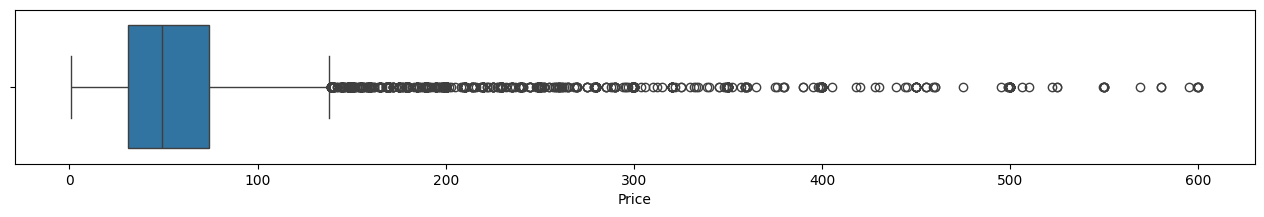

In [230]:
plt.figure(figsize=(16, 2))
sns.boxplot(df['Price'], orient='h')
plt.show()

In [231]:
def df_describe(df, numerical_columns):
  min_vals = []
  max_vals = []
  Q1_ = []
  Q2_ = []
  Q3_ = []
  IQR_ = []
  lower_bound_ = []
  upper_bound_ = []
  for column in numerical_columns:
    min_vals.append(df[column].min())
    max_vals.append(df[column].max())

    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Q1_.append(Q1)
    Q2_.append(Q2)
    Q3_.append(Q3)
    IQR_.append(IQR)
    lower_bound_.append(lower_bound)
    upper_bound_.append(upper_bound)

  # return pd.DataFrame(data = [min_vals, lower_bound_,Q1_,Q2_,Q3_ ,IQR_,upper_bound_,max_vals],
  #            columns=["min_vals", "lower_bound","Q1","Q2","Q3","IQR","upper_bound","max_vals"])
  return pd.DataFrame({
      'min': min_vals,
      '25%': Q1_,
      '50%': Q2_,
      '75%': Q3_,
      'max': max_vals,
      'IQR': IQR_,
      'lower_bound': lower_bound_,
      'upper_bound': upper_bound_}, index=numerical_columns)


In [232]:
df_describe(df, numerical_columns)

,min,25%,50%,75%,max,IQR,lower_bound,upper_bound
Accomodates,1.0,2.0,2.0,3.0,16.0,1.0,0.5,4.5
Bathrooms,0.0,1.0,1.0,1.0,8.5,0.0,1.0,1.0
Bedrooms,0.0,1.0,1.0,1.0,10.0,0.0,1.0,1.0
Beds,0.0,1.0,1.0,2.0,22.0,1.0,-0.5,3.5
Guests Included,1.0,1.0,1.0,1.0,16.0,0.0,1.0,1.0
Min Nights,1.0,2.0,3.0,4.0,1000.0,2.0,-1.0,7.0
Reviews,0.0,1.0,5.0,17.0,545.0,16.0,-23.0,41.0
Price,1.0,31.0,49.0,74.0,600.0,43.0,-33.5,138.5


In [ ]:
# df[numerical_columns].describe().loc[['min', '25%', '50%', '75%', 'max']].T

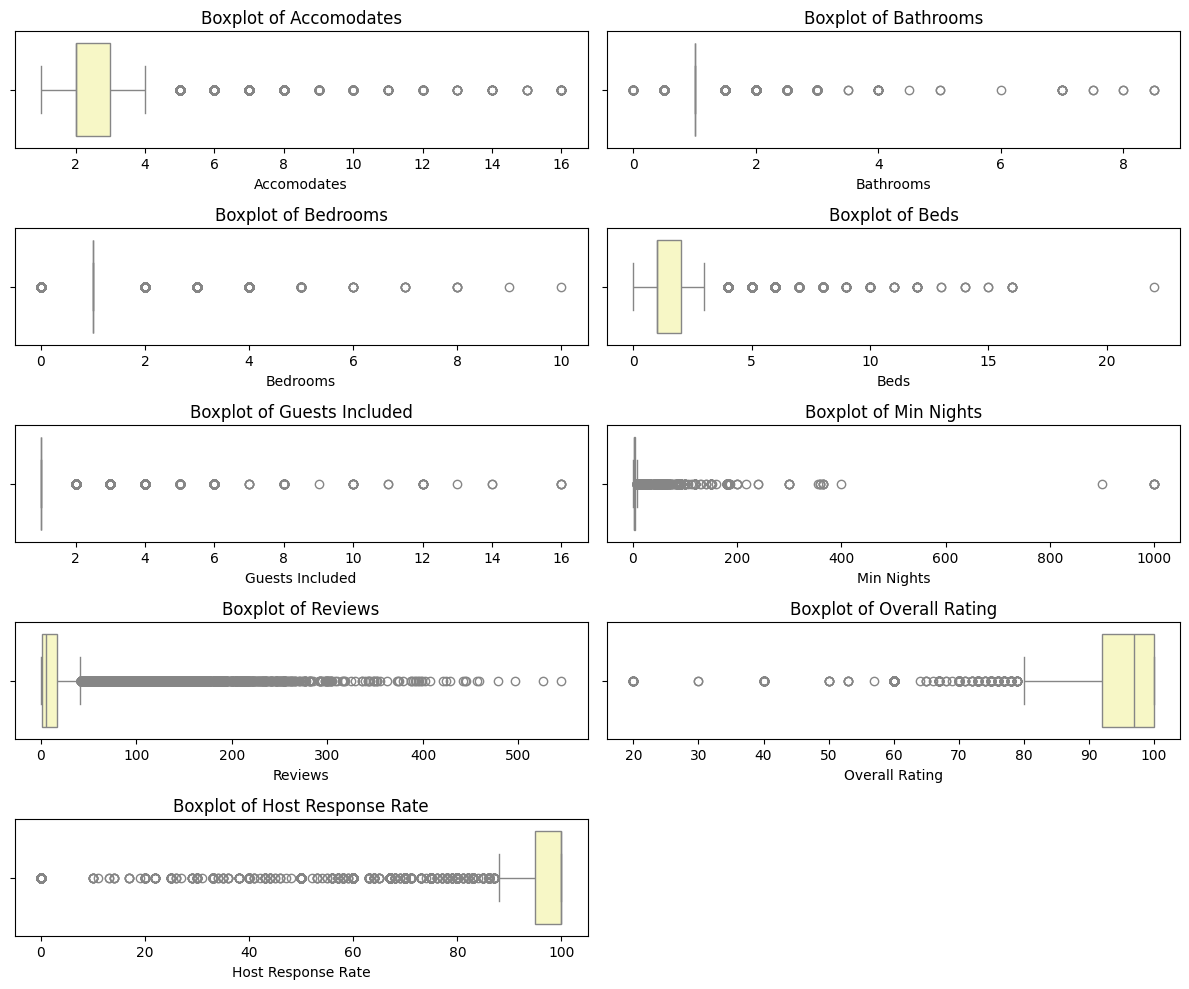

In [234]:
numericals = numerical_columns + ["Overall Rating", "Host Response Rate"]
plt.figure(figsize=(12, 10))
for i, col in enumerate([c for c in numericals if c != 'Price'], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[col].dropna(), palette="Spectral")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

The boxplots reveal potential outliers in several numerical features, particularly:

1. Price: Likely contains extreme values (high-end listings or pricing errors).
2. Reviews: Some listings have significantly higher review counts than others.
3. Bedrooms, Bathrooms, Beds, Accommodates: Some properties might have unrealistic values (e.g., too many or too few bedrooms relative to accommodations).